C:\Users\HP\anaconda3\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


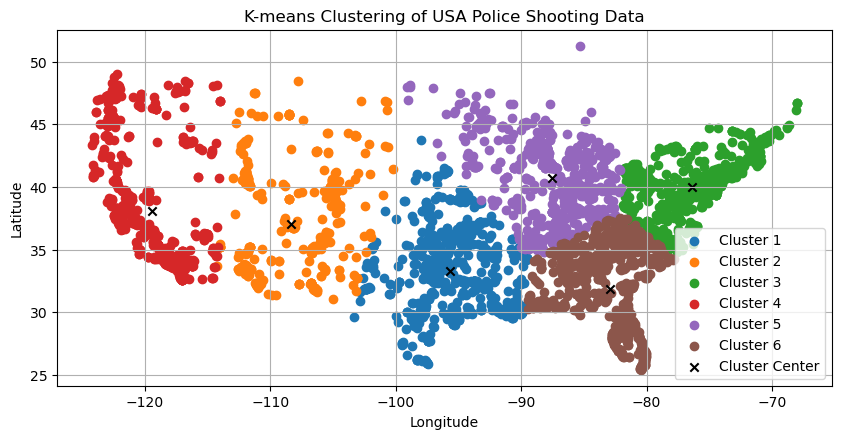

In [13]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data from CSV file into a DataFrame
data = pd.read_csv('fatal-police-shootings-data-continental_US.csv')

# Check for missing values and handle them if necessary
data.dropna(inplace=True)  # Drop rows with missing values, if needed

# Select relevant features for clustering (e.g., latitude and longitude)
coordinates = data[['latitude', 'longitude']]

# Convert coordinates to a numpy array
coordinates_array = coordinates.values

# Decide on the number of clusters
num_clusters = 6  # You can adjust this based on your analysis

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(coordinates_array)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster labels for each data point
labels = kmeans.labels_

# Plot the clustered data points
plt.figure(figsize=(10, 8))

# Plot each cluster
for i in range(num_clusters):
    cluster_points = coordinates_array[labels == i]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 0], label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], color='black', marker='x', label='Cluster Center')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of USA Police Shooting Data')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()




In [32]:
data.head(10)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,Jonathan David Victor,12-05-2017,shot,unarmed,35.0,M,W,Baldwin County,AL,False,other,Not fleeing,False,-122.276,37.779,True
2,Elman Jerald Roberts,08-09-2018,shot,gun,63.0,M,W,Citronelle,AL,False,attack,Not fleeing,False,-88.290,31.066,True
3,Terrence Edward White,10-12-2019,shot,gun,66.0,M,W,Semmes,AL,True,attack,Not fleeing,False,-88.267,30.834,True
4,Bernie Wade Johnson,09-01-2020,shot and Tasered,hammer,34.0,M,W,Semmes,AL,True,attack,Not fleeing,False,-88.229,30.762,True
5,Treyh Webster,04-02-2021,shot,gun,18.0,M,B,Mobile,AL,False,attack,Not fleeing,False,-88.212,30.689,True
6,Scott Beech,19-09-2015,shot,gun,57.0,M,W,Washington County,AL,True,attack,Not fleeing,True,-88.212,31.623,True
7,Donald Fulton,14-02-2018,shot,gun,41.0,M,W,Mobile,AL,True,attack,Not fleeing,False,-88.173,30.719,True
8,Rebecca Angel Alexander,24-01-2020,shot,gun,35.0,F,W,Coden,AL,True,attack,Not fleeing,False,-88.169,30.464,True
9,Levi Morse,19-05-2020,shot,gun,32.0,M,W,Chunchula,AL,False,attack,Not fleeing,False,-88.164,30.951,True
10,Lawrence Hawkins,18-11-2017,shot,unarmed,56.0,M,B,Prichard,AL,False,other,Car,False,-88.102,30.735,True


In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load data from CSV file into a DataFrame
data = pd.read_csv('fatal-police-shootings-data-continental_US.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Select features for clustering (latitude, longitude, and race)
features = data[['latitude', 'longitude', 'race']]

# Handle missing values using SimpleImputer with the most frequent strategy for non-numeric data
imputer = SimpleImputer(strategy='most_frequent')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Convert features to a numpy array
features_array = features_imputed[['latitude', 'longitude']].values

# Specify the number of clusters
num_clusters = 6  # Adjust as needed

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(features_array)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
features_imputed['cluster'] = cluster_labels

# Initialize a dictionary to store race counts for each cluster
race_counts_per_cluster = {cluster_id: {'W': 0, 'B': 0, 'H': 0, 'A': 0, 'N': 0, 'O': 0} for cluster_id in range(num_clusters)}

# Count race occurrences within each cluster
for cluster_id in range(num_clusters):
    cluster_data = features_imputed[features_imputed['cluster'] == cluster_id]
    race_counts = cluster_data['race'].value_counts()
    for race, count in race_counts.items():
        race_counts_per_cluster[cluster_id][race] = count

# Print race statistics for each cluster
for cluster_id, race_counts in race_counts_per_cluster.items():
    print(f"Cluster {cluster_id}: Race distribution - {race_counts}")





C:\Users\HP\anaconda3\anacon\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: Race distribution - {'W': 484, 'B': 264, 'H': 166, 'A': 11, 'N': 8, 'O': 2}
Cluster 1: Race distribution - {'W': 328, 'B': 57, 'H': 220, 'A': 7, 'N': 32, 'O': 0}
Cluster 2: Race distribution - {'W': 341, 'B': 292, 'H': 44, 'A': 8, 'N': 3, 'O': 4}
Cluster 3: Race distribution - {'W': 443, 'B': 191, 'H': 397, 'A': 43, 'N': 13, 'O': 7}
Cluster 4: Race distribution - {'W': 460, 'B': 284, 'H': 36, 'A': 6, 'N': 12, 'O': 1}
Cluster 5: Race distribution - {'W': 558, 'B': 308, 'H': 81, 'A': 9, 'N': 0, 'O': 5}


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import folium

# Load data from CSV file into a DataFrame
data = pd.read_csv('fatal-police-shootings-data-continental_US.xls')

# Drop rows with missing values
data.dropna(inplace=True)

# Select features for clustering (latitude, longitude, and race)
features = data[['latitude', 'longitude', 'race']]

# Handle missing values using SimpleImputer with the most frequent strategy for non-numeric data
imputer = SimpleImputer(strategy='most_frequent')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Convert features to a numpy array
features_array = features_imputed[['latitude', 'longitude']].values

# Specify the number of clusters
num_clusters = 6  # Adjust as needed

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(features_array)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
features_imputed['cluster'] = cluster_labels

# Initialize a dictionary to store race counts for each cluster
race_counts_per_cluster = {cluster_id: {'W': 0, 'B': 0, 'H': 0, 'A': 0, 'N': 0, 'O': 0} for cluster_id in range(num_clusters)}

# Count race occurrences within each cluster
for cluster_id in range(num_clusters):
    cluster_data = features_imputed[features_imputed['cluster'] == cluster_id]
    race_counts = cluster_data['race'].value_counts()
    for race, count in race_counts.items():
        race_counts_per_cluster[cluster_id][race] = count

# Initialize the map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add markers for each cluster
for index, row in features_imputed.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue').add_to(m)

# Save the map to an HTML file
m.save('us_map_clusters.html')


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 0: invalid continuation byte